In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
df = pd.read_csv('us_state_vaccinations.csv')
df.head()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7557.0,7498.0,1529.0,NaN


In [3]:
df_clean = df[['date', 'location', 'people_vaccinated_per_hundred']]
df_clean.head()

,date,location,people_vaccinated_per_hundred
0,2021-01-12,Alabama,1.45
1,2021-01-13,Alabama,1.53
2,2021-01-14,Alabama,1.64
3,2021-01-15,Alabama,1.77
4,2021-01-16,Alabama,NaN


In [4]:
# forward propogate 'na' values
df_clean.fillna(method="ffill", inplace=True)
df_clean.head()

C:\Users\18586\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,date,location,people_vaccinated_per_hundred
0,2021-01-12,Alabama,1.45
1,2021-01-13,Alabama,1.53
2,2021-01-14,Alabama,1.64
3,2021-01-15,Alabama,1.77
4,2021-01-16,Alabama,1.77


In [5]:
df_clean.sort_values('people_vaccinated_per_hundred', ascending=False)

,date,location,people_vaccinated_per_hundred
11149,2021-08-22,Republic of Palau,89.89
11148,2021-08-21,Republic of Palau,89.80
11147,2021-08-20,Republic of Palau,89.12
11146,2021-08-19,Republic of Palau,89.09
11145,2021-08-18,Republic of Palau,89.07
...,...,...,...
2677,2021-01-13,Federated States of Micronesia,0.54
2676,2021-01-12,Federated States of Micronesia,0.40
2454,2021-01-13,District of Columbia,0.28
3345,2021-01-12,Guam,0.24


In [6]:
# top 10 states only for this viz
states = ['California', 'Texas', 'Florida', 'New York', 'New Jersey', 'Washington', 'Virginia', 'Pennsylvania', 'Illinois', 'Michigan', 'Ohio']

df_clean = df_clean[df_clean['location'].isin(states)]

In [7]:
df_clean.dtypes

date                              object
location                          object
people_vaccinated_per_hundred    float64
dtype: object

In [8]:
# convert date to datetime
df_clean['date'] =  pd.to_datetime(df_clean['date'])

In [9]:
df_clean.dtypes

date                             datetime64[ns]
location                                 object
people_vaccinated_per_hundred           float64
dtype: object

In [10]:
df_clean.to_csv('vacc.csv')

In [38]:
df_clean = df_clean.sort_values('people_vaccinated_per_hundred', ascending=False)

In [39]:
df_clean

,date,location,people_vaccinated_per_hundred
8696,2021-08-22,New Jersey,68.86
8695,2021-08-21,New Jersey,68.75
8694,2021-08-20,New Jersey,68.60
8693,2021-08-19,New Jersey,68.48
10703,2021-08-22,Pennsylvania,68.32
...,...,...,...
6690,2021-01-12,Michigan,2.08
10481,2021-01-12,Pennsylvania,2.08
1340,2021-01-14,California,2.03
1339,2021-01-13,California,1.88


<BarContainer object of 2230 artists>

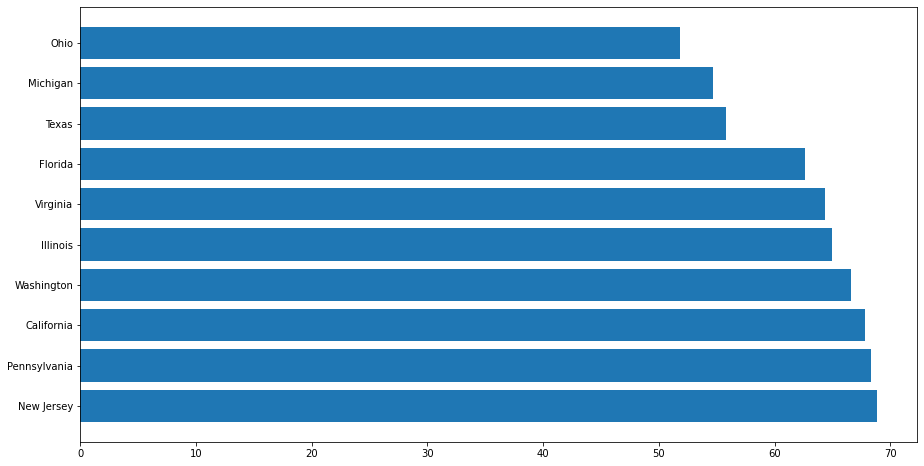

In [40]:
# build basic bar chart
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(df_clean['location'], df_clean['people_vaccinated_per_hundred'])

In [43]:
# select colors

colors = dict(zip(
    ['California', 'Texas', 'Florida', 'New York', 'New Jersey', 'Washington', 'Virginia', 'Pennsylvania', 'Illinois', 'Michigan', 'Ohio'],
    ['#adb0ff', '#ffb3ff', '#90d595', '#e48381',
     '#aafbff', '#f7bb5f', '#eafb50', '#adg0fa', '#ffg3fa', '#90g591', '#e42382']
))
group_lk = df_clean.set_index('location')['date'].to_dict()

KeyError: Timestamp('2021-01-12 00:00:00')

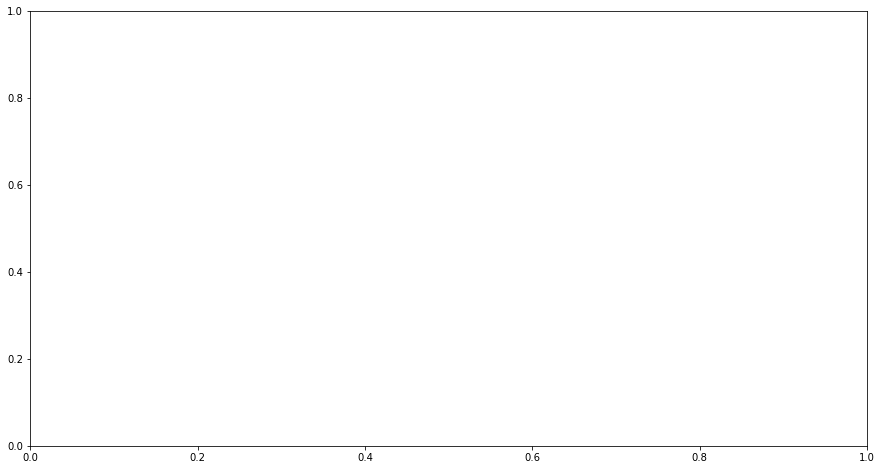

In [44]:

fig, ax = plt.subplots(figsize=(15, 8))
df_clean = df_clean[::-1]   # flip values from top to bottom
# pass colors values to `color=`
ax.barh(df_clean['location'], df_clean['people_vaccinated_per_hundred'], color=[colors[group_lk[x]] for x in df_clean['location']])
# iterate over the values to plot labels and values (Tokyo, Asia, 38194.2)
for i, (value, name) in enumerate(zip(df_clean['people_vaccinated_per_hundred'], df_clean['location'])):
    ax.text(value, i,     name,            ha='right')  # Tokyo: name
    ax.text(value, i-.25, group_lk[name],  ha='right')  # Asia: group name
    ax.text(value, i,     value,           ha='left')   # 38194.2: value
# Add year right middle portion of canvas
ax.text(1, 0.4, 2021, transform=ax.transAxes, size=46, ha='right')